# ECE 269 - Linear Algebra - Fall 2019 - Final Project - EigenFaces

## EigenFaces project worked on by:-
## Name :- Anirudh Swaminathan
## PID :- A53316083
## Email ID :- aswamina@ucsd.edu

In [2]:
%matplotlib inline

# for working with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# randomness
import random

# matrices
import numpy as np

# eigen value computation
from scipy.linalg import eigh

In [3]:
# dataset directory specified here
data_dir = "../datasets/"

In [4]:
# data stuff here
neutral_imgs = []
smiling_imgs = []
mean_img = None
dataset = []
image_size = None
eigen_faces = None

### Load the data

In [5]:
for i in range(200):
    nimg = mpimg.imread(data_dir + str(i + 1) + "a.jpg")
    simg = mpimg.imread(data_dir + str(i + 1) + "b.jpg")
    neutral_imgs.append(nimg)
    smiling_imgs.append(simg)
dataset = neutral_imgs[:190]
dataset = np.array(dataset)
image_size = (dataset.shape[1], dataset.shape[2])
dataset = dataset.reshape(dataset.shape[0], dataset.shape[1] * dataset.shape[2])
# 31266 * 190 - dataset shape
dataset = np.transpose(dataset)

### Display 5 random neutral and smiling images to verify if the data loading was correct

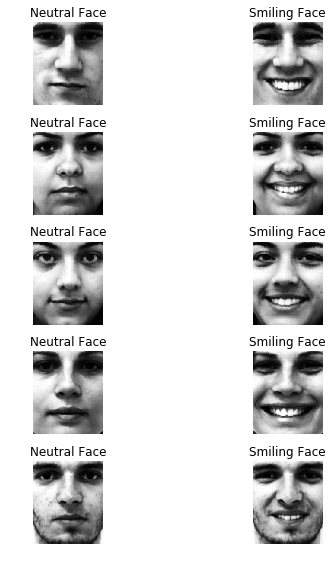

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 8), sharex="all", sharey="all")
for i in range(5):
    j = random.randint(0, 199)
    n = neutral_imgs[j]
    s = smiling_imgs[j]
    
    # display the neutral image
    axes[i][0].imshow(n, cmap="gray")
    axes[i][0].axis('off')
    axes[i][0].set_title("Neutral Face")
    
    # display the smiling image
    axes[i][1].imshow(s, cmap="gray")
    axes[i][1].axis('off')
    axes[i][1].set_title("Smiling Face")
    
plt.tight_layout()
fig.canvas.draw()

### Question a) - Computing the PCs using 1st individual's neutral expressions and plotting the singular values of the data matrix

#### Compute Mean Face

In [7]:
# calculate the mean face for the dataset
num_imgs = dataset.shape[1]
# print(self.dataset.shape)
mean_img = np.matmul(dataset, np.ones((num_imgs, 1))) / num_imgs
# 31266 * 1 - mean_img
mean_img = mean_img
print(mean_img.shape)

(31266, 1)


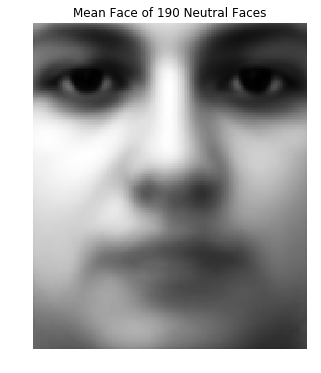

In [8]:
# plot the mean face of the neutral expressions
plt_mean_img = mean_img.reshape(image_size[0], image_size[1])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.imshow(plt_mean_img, cmap="gray")
axes.axis('off')
axes.set_title("Mean Face of 190 Neutral Faces")
fig.canvas.draw()

#### Compute the eigen values and the corresponding eigen faces

In [9]:
# 31266 * 180
mean_offset = dataset - mean_img

# 180*180
mod_cov = np.matmul(np.transpose(mean_offset), mean_offset)
print(mod_cov.shape)

# check if this is a symmetric matrix
print(np.allclose(mod_cov, np.transpose(mod_cov)))

(190, 190)
True


In [10]:
# compute the eigen values and the corresponding eigenvectors in ascending order
# 190 eigen values
# 190 * 190 eigen vectors
# ith column - corresponding to the ith eigen vector
eig_vals, mod_eig_vecs = eigh(mod_cov)
print(eig_vals.shape, mod_eig_vecs.shape)

# 31266 * 190 - eigen vectors of the original data
eig_vecs = np.matmul(mean_offset, mod_eig_vecs)

# normalize the eigen vectors now
# 31266 * 190 normalized eigen vectors
norm_cnst = np.sum(np.square(eig_vecs), 0)
eigen_faces = np.divide(eig_vecs, norm_cnst)
print(eigen_faces.shape)

(190,) (190, 190)
(31266, 190)


#### Plot the singular values of the data matrix

Since the matrix $A^TA$ is symmetric, it's singluar values are also it's eigen values, and they are real.

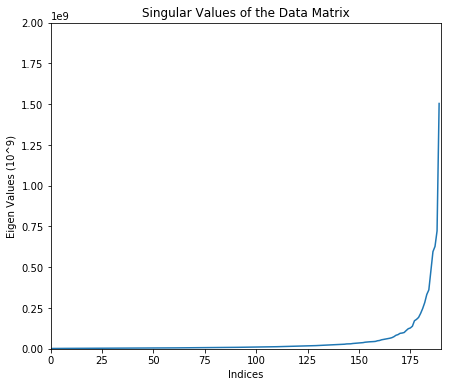

In [11]:
# plot the singular values of the data matrix
indices = [i for i in range(190)]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
axes.plot(indices, eig_vals)
axes.set_xlabel("Indices")
axes.set_ylabel("Eigen Values (10^9)")
axes.set_xlim(0, 190)
axes.set_ylim(0, 2*1e9)
axes.set_title("Singular Values of the Data Matrix")
fig.canvas.draw()

For choosing the eigen values, we take the largest eigen values as they indicate the maximum variance between the different features. We can choose the number of PCs as the one that gives >95% variance between the features.

In [12]:
tot = np.sum(eig_vals)
su = 0
ans = -1
for j in range(189, -1, -1):
    su += eig_vals[j]
    if su/tot>0.95:
        ans = 190-j
        print("The largest {} eigen vectors encode >95% variability of the dataset".format(ans))
        break

The largest 96 eigen vectors encode >95% variability of the dataset


Hence, we can choose $96$ largest eigen values and their corresponding eigen vectors to represent greater than $95%$ variability of the given dataset of faces.

### Question b) - Reconstruction of a neutral individual's PCs using different number of PC's

In [13]:
def reconstruct_image(orig, pcs):
    """A function to reconstruct the original image with the given PCs"""
    # perform mean subtraction
    # 31566 * 1
    mean_sub = orig - mean_img
    
    # calculate the weights
    # l * 31566 * 31566 * 1 = l * 1
    w = np.matmul(np.transpose(pcs), mean_sub)
    
    # 31566 * l * l * 1 = 31566 * 1
    recon = np.matmul(pcs, w)
    mse = np.mean(np.sum(np.square(orig - recon)))
    return recon, mse

In [ ]:
# random index to pick image from
rand_ind = random.randint(0, 189)
original_img = dataset[:, rand_ind]
mses = []
recs = []

# Reconstruct the image for all the PCs
for j in range(190):
    #print(dataset.shape)
    pcs = eigen_faces[:, 190-j-1:]
    #print(pcs.shape)
    rec, mse = reconstruct_image(original_img, pcs)
    if j%10 == 1:
        recs.append(rec)
    mses.append(mse)

In [15]:
print(mses)                                                          s

[]
